# Exploratory Data Analysis

### Roles to Explore

In [ ]:
# Importing Libaries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

### Filter for US Data Analyst roles

In [2]:
df_DA_US = df[(df['job_country'] == "United States") & (df['job_title_short'] == "Data Analyst")]

### No. of Job Postings by location

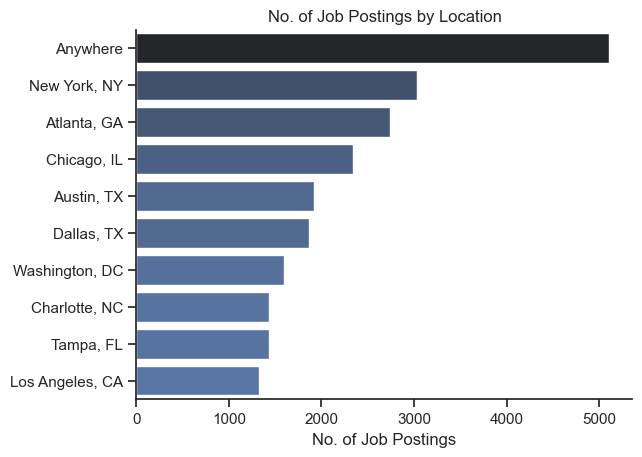

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)

# Formatting the chart
sns.despine()
plt.title("No. of Job Postings by Location")
plt.ylabel("")
plt.xlabel("No. of Job Postings")
plt.show()

### Job Work from Home, Health Insurance and Degree Requirement Status

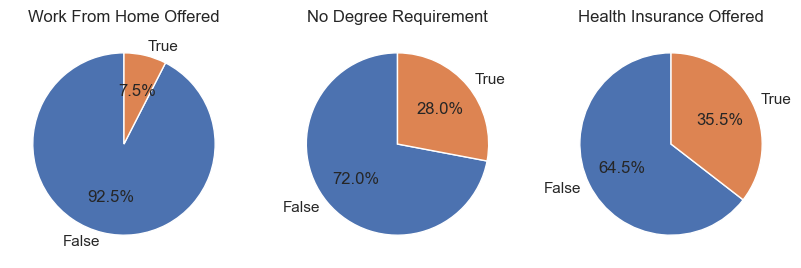

In [4]:
column_titles = {
    'job_work_from_home': "Work From Home Offered",
    'job_no_degree_mention': "No Degree Requirement",
    'job_health_insurance': "Health Insurance Offered"
}

fig, ax = plt.subplots(1, 3)

for i, (column_title, chart_title) in enumerate(column_titles.items()):
    df_plot = df_DA_US[column_title].value_counts().to_frame()

    df_plot.plot(kind="pie", y="count", autopct="%1.1f%%", startangle=90, ax=ax[i], legend=False)
    ax[i].set_title(chart_title)
    ax[i].set_ylabel("")

fig.set_size_inches(10, 5)

### Job Postings By Company

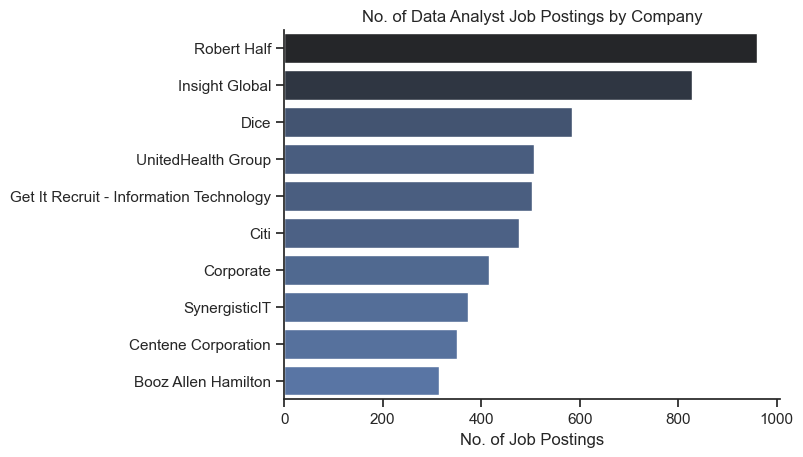

In [5]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)

# Formatting the chart
sns.despine()
plt.title("No. of Data Analyst Job Postings by Company")
plt.ylabel("")
plt.xlabel("No. of Job Postings")
plt.show()